In [1]:
# Import libraries:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import NearestNeighbors

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import NMF
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

# Import file(s) from main folder to start looking at columns in each file:
df_details = pd.read_csv(r'/Users/ben/CSUF/Course 5, Capstone/MAL Anime Top 10000 Details.csv')
df_writtenreviews = pd.read_csv(r'/Users/ben/CSUF/Course 5, Capstone/MAL Anime Reviews 85k.csv')
df_UserRecs = pd.read_csv(r'/Users/ben/CSUF/Course 5, Capstone/MAL Anime Recommendations 45k.csv')

Examine the columns for each file:

In [2]:
df_details.head() 
# This file has the most useful columns, has avg viewer ratings as 'score', 'ranking', 'popularity'.

,Anime Title,MAL Url,English,Japanese,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Source,Genres,Duration,Rating,Score,Ranking,Popularity,Members,Favorites,Summary
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),...,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",24 min. per ep.,R - 17+ (violence & profanity),9.22,1,4,2025613,167812,"""In order for something to be obtained, someth..."
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),...,Visual novel,"Thriller, Sci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,9.12,2,8,1636151,139909,The self-proclaimed mad scientist Rintarou Oka...
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),...,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",24 min. per ep.,PG-13 - Teens 13 or older,9.11,3,330,363879,10353,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_H...,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),...,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",23 min. per ep.,PG-13 - Teens 13 or older,9.11,4,14,1459320,130492,Hunter x Hunter is set in a world where Hunter...
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,NaN,...,Novel,"Military, Sci-Fi, Space, Drama",26 min. per ep.,R - 17+ (violence & profanity),9.10,5,629,212162,13100,The 150-year-long stalemate between the two in...


In [3]:
df_details.info()
#  Missing values for English and Japanese title columns, 'Premiered', 'Broadcast', 'Producers','Licensors', & 'Studios'. 
# Can remove most columns as there is other valuable information (i.e. 'Anime Title', 'Aired').
# Will try to revisit 'Studios and 'Producers'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Anime Title  10000 non-null  object 
 1   MAL Url      10000 non-null  object 
 2   English      4983 non-null   object 
 3   Japanese     9993 non-null   object 
 4   Type         10000 non-null  object 
 5   Episodes     10000 non-null  object 
 6   Status       10000 non-null  object 
 7   Aired        10000 non-null  object 
 8   Premiered    3681 non-null   object 
 9   Broadcast    3681 non-null   object 
 10  Producers    6261 non-null   object 
 11  Licensors    3617 non-null   object 
 12  Studios      8030 non-null   object 
 13  Source       10000 non-null  object 
 14  Genres       10000 non-null  object 
 15  Duration     10000 non-null  object 
 16  Rating       10000 non-null  object 
 17  Score        10000 non-null  float64
 18  Ranking      10000 non-null  int64  
 19  Popul

In [4]:
df_writtenreviews.head()
# Gives insight into what the viewers liked about each Anime: 'Story', 'Animation','Sound', 'Character'. 
# Can be averaged for each Anime and used as part of a merged file indexed by Anime Title. 
# 'Review' column could be very useful in later revisions for NLP, word-counts, or keywords as features.

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,"First of all, I have seen the original FMA and..."
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,Adaptations have long been a thorn in the side...
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7,Fullmetal Alchemist: Brotherhood gets an immen...
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8,Overview:\nFMA Brotherhood is an anime that ne...
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446,5,2,7,7,8,5,Since I couldn't find any legitimate objective...


In [5]:
df_writtenreviews.info()
# There does not seem to be any missing values for this file.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85953 entries, 0 to 85952
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Anime Rank        85953 non-null  int64 
 1   Anime Title       85953 non-null  object
 2   Anime URL         85953 non-null  object
 3   Username          85953 non-null  object
 4   Review Date       85953 non-null  object
 5   Episodes Watched  85953 non-null  object
 6   Review Likes      85953 non-null  int64 
 7   Overall Rating    85953 non-null  int64 
 8   Story Rating      85953 non-null  int64 
 9   Animation Rating  85953 non-null  int64 
 10  Sound Rating      85953 non-null  int64 
 11  Character Rating  85953 non-null  int64 
 12  Enjoyment Rating  85953 non-null  int64 
 13  Review            85953 non-null  object
dtypes: int64(8), object(6)
memory usage: 9.2+ MB


In [6]:
df_UserRecs.head()
# Providing user-recommended anime for each 'Anime Title', sorted by most frequent recommendations.
# It look like most of the people who like Full Metal Alchemist also recommended Hunter x Hunter...
# This file would also be useful as a baseline for recommendations based on user-recs. Though many titles would have missing recs.

,Rank,Anime Title,Anime URL,Recommended Title,No. of Recommendations
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Hunter x Hunter (2011),87
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Shingeki no Kyojin,31
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,D.Gray-man,20
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Ao no Exorcist,16
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Code Geass: Hangyaku no Lelouch,16


In [7]:
df_UserRecs.info()
# File did not have anu missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45360 entries, 0 to 45359
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    45360 non-null  int64 
 1   Anime Title             45360 non-null  object
 2   Anime URL               45360 non-null  object
 3   Recommended Title       45360 non-null  object
 4   No. of Recommendations  45360 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


# At this point: Will mostly work from edited 'df_details' dataframe (drop/transform/merging some columns from 'df_writtenreviews'). Dealing with 'Producer' and 'Studio' will require handling missing values, not to mention any values that may be missing after indexing/merging columns from df_writtenreviews.

In [8]:
# Version of df_writtenreviews to add columns to df_details (pulling just rows for reviews with the most likes). 
df_Reviews_mostliked = df_writtenreviews.sort_values(['Anime Title', 'Review Likes'],ascending=False).groupby(['Anime Title']).first().reset_index()
df_Reviews_mostliked = df_Reviews_mostliked.sort_values(['Anime Rank'], ascending=True)
df_Reviews_mostliked.head()

,Anime Title,Anime Rank,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review
1047,Fullmetal Alchemist: Brotherhood,1,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,"First of all, I have seen the original FMA and..."
3604,Steins;Gate,2,https://myanimelist.net/anime/9253/Steins_Gate...,Archaeon,"Sep 14, 2011",24 of 24 episodes seen,2216,8,8,8,8,8,8,"""People assume that time is a strict progressi..."
1196,Gintama°,3,https://myanimelist.net/anime/28977/Gintama°/r...,Tyrel,"Mar 30, 2016",51 of 51 episodes seen,364,10,10,9,10,10,10,Have you ever wanted to laugh so hard that it ...
1568,Hunter x Hunter (2011),4,https://myanimelist.net/anime/11061/Hunter_x_H...,Cresherhsm,"Oct 2, 2014",148 of 148 episodes seen,2735,10,10,9,8,10,10,The lack of popularity surrounding Hunter x Hu...
1157,Ginga Eiyuu Densetsu,5,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,santetjan,"May 27, 2008",110 of 110 episodes seen,2094,10,10,8,10,9,10,This series is overrated on this site. That is...


In [9]:
df_Reviews_mostliked.info()
# This is what I was after. Now I can try to merge the rating values and top liked written reviews for each 'Anime Title'.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4315 entries, 1047 to 2956
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Anime Title       4315 non-null   object
 1   Anime Rank        4315 non-null   int64 
 2   Anime URL         4315 non-null   object
 3   Username          4315 non-null   object
 4   Review Date       4315 non-null   object
 5   Episodes Watched  4315 non-null   object
 6   Review Likes      4315 non-null   int64 
 7   Overall Rating    4315 non-null   int64 
 8   Story Rating      4315 non-null   int64 
 9   Animation Rating  4315 non-null   int64 
 10  Sound Rating      4315 non-null   int64 
 11  Character Rating  4315 non-null   int64 
 12  Enjoyment Rating  4315 non-null   int64 
 13  Review            4315 non-null   object
dtypes: int64(8), object(6)
memory usage: 505.7+ KB


In [10]:
# Let's try a LEFT JOIN in Python and I can remove any extra columns later:
df_details = df_details.merge(df_Reviews_mostliked, on='Anime Title', how='left')
df_details.head()

,Anime Title,MAL Url,English,Japanese,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),...,"Jan 25, 2010",64 of 64 episodes seen,3464.0,10.0,10.0,9.0,9.0,10.0,10.0,"First of all, I have seen the original FMA and..."
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),...,"Sep 14, 2011",24 of 24 episodes seen,2216.0,8.0,8.0,8.0,8.0,8.0,8.0,"""People assume that time is a strict progressi..."
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),...,"Mar 30, 2016",51 of 51 episodes seen,364.0,10.0,10.0,9.0,10.0,10.0,10.0,Have you ever wanted to laugh so hard that it ...
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_H...,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),...,"Oct 2, 2014",148 of 148 episodes seen,2735.0,10.0,10.0,9.0,8.0,10.0,10.0,The lack of popularity surrounding Hunter x Hu...
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,NaN,...,"May 27, 2008",110 of 110 episodes seen,2094.0,10.0,10.0,8.0,10.0,9.0,10.0,This series is overrated on this site. That is...


In [12]:
# Now I can try to pull the top user recommended title for each Anime from df_UserRecs:
df_UserRecs_popular = df_UserRecs.sort_values(['Anime Title', 'No. of Recommendations'],ascending=False).groupby(['Anime Title']).first().reset_index()
df_UserRecs_popular = df_UserRecs_popular.sort_values(['Rank'], ascending=True)
df_UserRecs_popular.head()

,Anime Title,Rank,Anime URL,Recommended Title,No. of Recommendations
388,Fullmetal Alchemist: Brotherhood,1,https://myanimelist.net/anime/5114/Fullmetal_A...,Hunter x Hunter (2011),87
1423,Steins;Gate,2,https://myanimelist.net/anime/9253/Steins_Gate...,Boku dake ga Inai Machi,104
455,Gintama°,3,https://myanimelist.net/anime/28977/Gintama°/u...,SKET Dance,3
606,Hunter x Hunter (2011),4,https://myanimelist.net/anime/11061/Hunter_x_H...,Fullmetal Alchemist: Brotherhood,87
435,Ginga Eiyuu Densetsu,5,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Code Geass: Hangyaku no Lelouch,20


In [13]:
df_UserRecs_popular.info()
# Looks like there are many missing values (only 1692 user recs & 10000 titles. Will merge the user recs using .merge() like in previous dataframe:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 388 to 1360
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Anime Title             1692 non-null   object
 1   Rank                    1692 non-null   int64 
 2   Anime URL               1692 non-null   object
 3   Recommended Title       1692 non-null   object
 4   No. of Recommendations  1692 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 79.3+ KB


In [14]:
df_details = df_details.merge(df_UserRecs_popular, on='Anime Title', how='left')
df_details.head()

,Anime Title,MAL Url,English,Japanese,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Rank,Anime URL_y,Recommended Title,No. of Recommendations
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),...,10.0,9.0,9.0,10.0,10.0,"First of all, I have seen the original FMA and...",1.0,https://myanimelist.net/anime/5114/Fullmetal_A...,Hunter x Hunter (2011),87.0
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),...,8.0,8.0,8.0,8.0,8.0,"""People assume that time is a strict progressi...",2.0,https://myanimelist.net/anime/9253/Steins_Gate...,Boku dake ga Inai Machi,104.0
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),...,10.0,9.0,10.0,10.0,10.0,Have you ever wanted to laugh so hard that it ...,3.0,https://myanimelist.net/anime/28977/Gintama°/u...,SKET Dance,3.0
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_H...,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),...,10.0,9.0,8.0,10.0,10.0,The lack of popularity surrounding Hunter x Hu...,4.0,https://myanimelist.net/anime/11061/Hunter_x_H...,Fullmetal Alchemist: Brotherhood,87.0
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,NaN,...,10.0,8.0,10.0,9.0,10.0,This series is overrated on this site. That is...,5.0,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Code Geass: Hangyaku no Lelouch,20.0


In [15]:
# remove unused columns:
df_details = df_details.drop(columns=['MAL Url', 'English','Japanese', 'Premiered', 'Broadcast','Anime URL_y','Review Date','Episodes Watched', 'Review Likes','Type','Status', 'Anime Rank', 'Anime URL_x', 'Rank'])
pd.set_option('display.max_columns', None)
df_details.head()

,Anime Title,Episodes,Aired,Producers,Licensors,Studios,Source,Genres,Duration,Rating,Score,Ranking,Popularity,Members,Favorites,Summary,Username,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Recommended Title,No. of Recommendations
0,Fullmetal Alchemist: Brotherhood,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",24 min. per ep.,R - 17+ (violence & profanity),9.22,1,4,2025613,167812,"""In order for something to be obtained, someth...",tazillo,10.0,10.0,9.0,9.0,10.0,10.0,"First of all, I have seen the original FMA and...",Hunter x Hunter (2011),87.0
1,Steins;Gate,24,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,"Thriller, Sci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,9.12,2,8,1636151,139909,The self-proclaimed mad scientist Rintarou Oka...,Archaeon,8.0,8.0,8.0,8.0,8.0,8.0,"""People assume that time is a strict progressi...",Boku dake ga Inai Machi,104.0
2,Gintama°,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",24 min. per ep.,PG-13 - Teens 13 or older,9.11,3,330,363879,10353,"Gintoki, Shinpachi, and Kagura return as the f...",Tyrel,10.0,10.0,9.0,10.0,10.0,10.0,Have you ever wanted to laugh so hard that it ...,SKET Dance,3.0
3,Hunter x Hunter (2011),148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",Viz Media,Madhouse,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",23 min. per ep.,PG-13 - Teens 13 or older,9.11,4,14,1459320,130492,Hunter x Hunter is set in a world where Hunter...,Cresherhsm,10.0,10.0,9.0,8.0,10.0,10.0,The lack of popularity surrounding Hunter x Hu...,Fullmetal Alchemist: Brotherhood,87.0
4,Ginga Eiyuu Densetsu,110,"Jan 8, 1988 to Mar 17, 1997","Kitty Films, K-Factory",Sentai Filmworks,"Artland, Magic Bus",Novel,"Military, Sci-Fi, Space, Drama",26 min. per ep.,R - 17+ (violence & profanity),9.10,5,629,212162,13100,The 150-year-long stalemate between the two in...,santetjan,10.0,10.0,8.0,10.0,9.0,10.0,This series is overrated on this site. That is...,Code Geass: Hangyaku no Lelouch,20.0


In [16]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Anime Title             10000 non-null  object 
 1   Episodes                10000 non-null  object 
 2   Aired                   10000 non-null  object 
 3   Producers               6261 non-null   object 
 4   Licensors               3617 non-null   object 
 5   Studios                 8030 non-null   object 
 6   Source                  10000 non-null  object 
 7   Genres                  10000 non-null  object 
 8   Duration                10000 non-null  object 
 9   Rating                  10000 non-null  object 
 10  Score                   10000 non-null  float64
 11  Ranking                 10000 non-null  int64  
 12  Popularity              10000 non-null  int64  
 13  Members                 10000 non-null  int64  
 14  Favorites               10000 non-null 

# This looks like a good starting point for analysis. I will see how missing values may need to be handled as they start to be considered as features in the model. From here, can check correlations to wrap up the EDA.

In [17]:
#sns.pairplot(df_details)
## From these plots it looks like we may have: almost logarithmic relationship between 'Ranking' and 'Score', exponential between 'Favorites', 'Score','Ranking','Popularity', Linear between 'Favorites', 'Members', 'No. of Recommendations'. All of the "sub-category" ratings seem to be well distributed when plotted against each other. Now looking at the correlation table:

In [ ]:
#df_details.corr()
## Story and Character seem to affect Enjoyment and the Overall Rating the most. There are also interesting correlations between Sound and Animation, Character and Story, No. of Recommendations and Favorites.

In [18]:

## I still would like to see a few more details, such as distribution of ratings:

## Aside from 'Enjoyment Rating', most users really rated at 8 the most frequently. 0 Ratings were actually more common than I thought as well, sometimes showing up as fifth or sixth most common rating.

# Setting up a User-Item Matrix for an initial model (baseline) using KNN:

In [19]:
# Creating a User-Item Count Matrix:
# Shifting the IDs by 1
df_details['Ranking'] = df_details['Ranking'] -1
df_details['Username'] = df_details['Username'] -1

#Despite error, code still shifted values as intended.

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [20]:
Anime_index = df_details[['Ranking','Anime Title']].drop_duplicates()
Anime_index = Anime_index.set_index('Ranking')
Anime_index.sort_values('Ranking').head(25)
## index 23 = COWBOY BEBOP

,Anime Title
Ranking,
0,Fullmetal Alchemist: Brotherhood
1,Steins;Gate
2,Gintama°
3,Hunter x Hunter (2011)
4,Ginga Eiyuu Densetsu
5,Gintama'
6,Shingeki no Kyojin Season 3 Part 2
7,Gintama': Enchousen
8,3-gatsu no Lion 2nd Season


In [21]:
# Setup for Model 1: Collaborative Filtering using User-Item Matrix (ratings):
UserItemMatrix = pd.pivot_table(df_details, values = 'Score', index = ['Ranking'], columns = ['Username'])
print(UserItemMatrix.values.shape)

(4316, 2550)


In [22]:
UserItemMatrix

Username  --Sunclaudius  -Alice-  -Anokata  -FlameHaze-  -Haoto-  -Heika  \
Ranking                                                                    
0                   NaN      NaN       NaN          NaN      NaN     NaN   
1                   NaN      NaN       NaN          NaN      NaN     NaN   
2                   NaN      NaN       NaN          NaN      NaN     NaN   
3                   NaN      NaN       NaN          NaN      NaN     NaN   
4                   NaN      NaN       NaN          NaN      NaN     NaN   
...                 ...      ...       ...          ...      ...     ...   
4993                NaN      NaN       NaN          NaN      NaN     NaN   
4995                NaN      NaN       NaN          NaN      NaN     NaN   
4998                NaN      NaN       NaN          NaN      NaN     NaN   
4999                NaN      NaN       NaN          NaN      NaN     NaN   
5000                NaN      NaN       NaN          NaN      NaN     NaN   

Username  -HippySnob-  -Mahesvara  -Naami-  -Remix-  -SeRg-  -ShadowClaw-  \
Ranking                                                                     
0                 NaN         NaN      NaN      NaN     NaN           NaN   
1                 NaN         NaN      NaN      NaN     NaN           NaN   
2                 NaN         NaN      NaN      NaN     NaN           NaN   
3                 NaN         NaN      NaN      NaN     NaN           NaN   
4                 NaN         NaN      NaN      NaN     NaN           NaN   
...               ...         ...      ...      ...     ...           ...   
4993              NaN         NaN      NaN      NaN     NaN           NaN   
4995              NaN         NaN      NaN      NaN     NaN           NaN   
4998              NaN         NaN      NaN      NaN     NaN           NaN   
4999              NaN         NaN      NaN      NaN     NaN           NaN   
5000              NaN         NaN      NaN      NaN     NaN           NaN   

Username  011253  0207xander  032  0Seru0  0w0  19wongs4  1nfiniteXcaliber  \
Ranking                                                                      
0            NaN         NaN  NaN     NaN  NaN       NaN               NaN   
1            NaN         NaN  NaN     NaN  NaN       NaN               NaN   
2            NaN         NaN  NaN     NaN  NaN       NaN               NaN   
3            NaN         NaN  NaN     NaN  NaN       NaN               NaN   
4            NaN         NaN  NaN     NaN  NaN       NaN               NaN   
...          ...         ...  ...     ...  ...       ...               ...   
4993         NaN         NaN  NaN     NaN  NaN       NaN               NaN   
4995         NaN         NaN  NaN     NaN  NaN       NaN               NaN   
4998         NaN         NaN  NaN     NaN  NaN       NaN               NaN   
4999         NaN         NaN  NaN     NaN  NaN       NaN               NaN   
5000         NaN         NaN  NaN     NaN  NaN       NaN               NaN   

Username  2000  27lily  2Daggers  2LongDidntReview  2gud2btru  2life  \
Ranking                                                                
0          NaN     NaN       NaN               NaN        NaN    NaN   
1          NaN     NaN       NaN               NaN        NaN    NaN   
2          NaN     NaN       NaN               NaN        NaN    NaN   
3          NaN     NaN       NaN               NaN        NaN    NaN   
4          NaN     NaN       NaN               NaN        NaN    NaN   
...        ...     ...       ...               ...        ...    ...   
4993       NaN     NaN       NaN               NaN        NaN    NaN   
4995       NaN     NaN       NaN               NaN        NaN    NaN   
4998       NaN     NaN       NaN               NaN        NaN    NaN   
4999       NaN     NaN       NaN               NaN        NaN    NaN   
5000       NaN     NaN       NaN               NaN        NaN    NaN   

Username  33Nanoseconds  3N437  3ricTheRed  3xTripple  3x

## I can already see how this would not be a good approach, but it could be used as a baseline... (too many missing values for this dataset). A content-based method may be a better approach.

In [23]:
# Let's try filling the null values with zeros, just to get a baseline:
dummyMatrix1 = UserItemMatrix.fillna(0)

In [24]:
# set up the KNN model:
k=10
knn = NearestNeighbors(metric='cosine', n_neighbors=k)
knn.fit(dummyMatrix1)
distances, indices = knn.kneighbors(dummyMatrix1)

In [25]:
distances[:2]

array([[0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
indices[:10]

array([[   0, 1462, 2877, 2881, 2880, 2879, 2878, 2875, 2876, 2872],
       [ 459,  872,  734, 4144, 1286,  966,  995,  718,  193, 2045],
       [   2,    7, 2876, 2874, 2881, 2880, 2879, 2878, 2877, 2883],
       [   3, 2876, 2874, 2881, 2880, 2879, 2878, 2877, 2883, 2872],
       [3688,    4, 2216, 2876, 2874, 2879, 2878, 2877, 2881, 2875],
       [   5, 2876, 2874, 2881, 2880, 2879, 2878, 2877, 2883, 2872],
       [1443,    6,  137, 2874, 2880, 2879, 2878, 2877, 2876, 2882],
       [   2,    7, 2876, 2874, 2881, 2880, 2879, 2878, 2877, 2883],
       [   8, 2875, 2881, 2880, 2879, 2878, 2877, 2876, 2883, 2872],
       [   9,  727,  519, 3022, 2176, 1109,  579, 3462,  768, 3033]])

In [27]:
indices_near_Animes = indices[0]
Animes_indices = Anime_index.loc[indices_near_Animes]['Anime Title'].tolist()
print(indices_near_Animes, Animes_indices)

[   0 1462 2877 2881 2880 2879 2878 2875 2876 2872] ['Fullmetal Alchemist: Brotherhood', 'Fushigi no Umi no Nadia', 'Nanatsu no Taizai: Seisen no Shirushi', 'Owari no Seraph: Kyuuketsuki Shahar', 'Onmyou Taisenki', 'One Piece Recap', 'One Piece Film: Gold Episode 0 - 711 ver.', 'Machine-Doll wa Kizutsukanai', 'Mouretsu Pirates', 'Koukyoushihen Eureka Seven: Pocket ga Niji de Ippai']


### hmmm... I don't see Hunter x Hunter, or the other top 5 recommended titles by other users.. Let's check a few others:

In [28]:
def rec1_Animes(m_item):
    print('Titles similar to ', Anime_index.loc[m_item]['Anime Title'])
    indices_near_Animes = indices[m_item]
    Animes_indices = Anime_index.loc[indices_near_Animes]['Anime Title']

    for i in Animes_indices:
        print(i)
    print()
    print('___________________________________________________')
        
rec1_Animes(3) # Hunter x Hunter
rec1_Animes(16) # Code Geass
rec1_Animes(23) # Cowboy Bebop
rec1_Animes(27) # Monogatari
rec1_Animes(47) # Howl's Moving Castle

Titles similar to  Hunter x Hunter (2011)
Hunter x Hunter (2011)
Mouretsu Pirates
Lupin III: $1 Money Wars
Owari no Seraph: Kyuuketsuki Shahar
Onmyou Taisenki
One Piece Recap
One Piece Film: Gold Episode 0 - 711 ver.
Nanatsu no Taizai: Seisen no Shirushi
Ranma ½: Battle ga Ippai 29-nin no Korinai Yatsura
Koukyoushihen Eureka Seven: Pocket ga Niji de Ippai

___________________________________________________
Titles similar to  Code Geass: Hangyaku no Lelouch R2
Code Geass: Hangyaku no Lelouch R2
Nanatsu no Taizai: Seisen no Shirushi
Machine-Doll wa Kizutsukanai
Qin Shi Ming Yue: Wanli Changcheng
Owari no Seraph: Kyuuketsuki Shahar
Onmyou Taisenki
One Piece Recap
One Piece Film: Gold Episode 0 - 711 ver.
Ranma ½: Nettou Uta Gassen
Koukyoushihen Eureka Seven: Pocket ga Niji de Ippai

___________________________________________________
Titles similar to  Cowboy Bebop
Uchuu Senkan Yamato III
JoJo no Kimyou na Bouken (TV)
Yes! Precure 5
The iDOLM@STER Movie: Kagayaki no Mukougawa e!
Hibike! 

# Baseline Model, Conclusion: It seems like we got some distinct sub-genre recommendations for each title, but let's see if we can do better using the 'suprise' library.

In [29]:
# Check RMSE for best algorithm to use:

reader = Reader(rating_scale = (0,10))
data = Dataset.load_from_df(df_details[['Username', 'Ranking', 'Score']], reader)

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [30]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

# SVD will be the best algorithm for this dataset.
# (documentation says this is equivalent to Probabilistic Matrix Factorization).

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.613695,0.395957,0.007889
BaselineOnly,0.620180,0.026499,0.018781
NMF,0.763652,0.836688,0.009135
KNNBasic,0.763690,0.076342,0.019948
KNNWithMeans,0.763705,0.101294,0.012344
KNNWithZScore,0.763861,0.151944,0.022698


In [31]:
## Train test split, fit:
trainset, testset = train_test_split(data, test_size=.20)
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

# Accuracy metrics:
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.5945
MAE:  0.4576


0.45763706490948686

In [32]:
# Let's check if it will produce/predict a rating for a user who did not actually rate Cowboy Bebop:
uid = str('tazillo')  # Username = tazillo has not rated this title
iid = str(23)  # Item 23 = Cowboy Bebop

# predict rating
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: tazillo    item: 23         r_ui = 4.00   est = 6.78   {'was_impossible': False}


In [33]:
from collections import defaultdict
from surprise.model_selection import KFold

In [34]:
df_details['uid'] = df_details['Username']
df_details['user_ratings'] = df_details['Score']

def precision_recall_at_k(predictions, k=10, threshold=6.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


In [35]:
reader = Reader(rating_scale = (0,10))
data = Dataset.load_from_df(df_details[['Username', 'Ranking', 'Score']], reader)
kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=6.5)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.9984709480122325
0.9929221904397296
0.9985119047619048
0.9910776021267093
0.9984301412872841
0.9920651195087284
0.9984152139461173
0.9895060807303279
0.9985096870342772
0.9914463360343173


### If the prior two cells are correct, then the precision and recall should be very good for the predictions using SVD (when bad = rating 0-6.5, good = ratings 6.5-10)

In [37]:
def rec4_Animes(m_item):
    print('Titles similar to ', df_details.loc[m_item]['Anime Title'])
    indices_near_Animes = indices[m_item]
    Animes_indices = df_details.loc[indices_near_Animes]['Anime Title']

    for i in Animes_indices:
        print(i) #, distances, m_item, distances)
    print()
    #print(distances[i])
    #print()
    #print(indices[i])
    #print()
    print('___________________________________________________')
        

In [38]:
rec4_Animes(23)

Titles similar to  Cowboy Bebop
PopoloCrois
Over Drive
Seisenshi Dunbine
Sketchbook: Full Color's
Shakugan no Shana III (Final)
Maison Ikkoku
Naruto: Shippuuden Movie 1
Nanatsu no Taizai Movie: Tenkuu no Torawarebito
Otsukimi Recital
Street Fighter II Movie

___________________________________________________


# User-Item Collaborative Filter, Conclusion: It looks like only about half of the titles are similar (that's roughly a 50% hit rate, subjectively).

# Preparing a Content-Based Model:
### Looking into some features:

In [39]:
# Lets look at some of the categorical features:
Rating_feature = pd.pivot_table(data=df_details,index=['Rating'])
Rating_feature

,Animation Rating,Character Rating,Enjoyment Rating,Favorites,Members,No. of Recommendations,Overall Rating,Popularity,Ranking,Score,Sound Rating,Story Rating,user_ratings
Rating,,,,,,,,,,,,,
G - All Ages,7.555556,7.557870,7.898148,46.333487,6430.228176,4.278195,8.043981,9244.170901,6653.206005,6.272527,7.555556,7.215278,6.272527
None,6.696970,6.575758,6.606061,88.420635,17549.317460,3.800000,7.696970,6811.650794,5798.880952,6.504921,6.939394,6.272727,6.504921
PG - Children,7.717300,7.641350,8.177215,129.605031,15202.549686,4.864407,8.130802,7350.642767,5499.767296,6.569182,7.928270,7.337553,6.569182
PG-13 - Teens 13 or older,7.303443,7.189557,7.396141,834.557794,63958.007236,11.354589,7.629588,4848.013691,4394.941522,6.864931,7.262580,6.667045,6.864931
R - 17+ (violence & profanity),7.356037,6.911765,7.314241,2214.526006,133456.097154,16.614085,7.472136,3410.177625,3629.415113,7.087370,7.363777,6.648607,7.087370
R+ - Mild Nudity,7.747692,7.412308,7.803077,558.636829,64644.324808,12.475248,7.692308,4474.342711,5521.898977,6.564923,7.492308,6.806154,6.564923


<AxesSubplot:xlabel='Rating'>

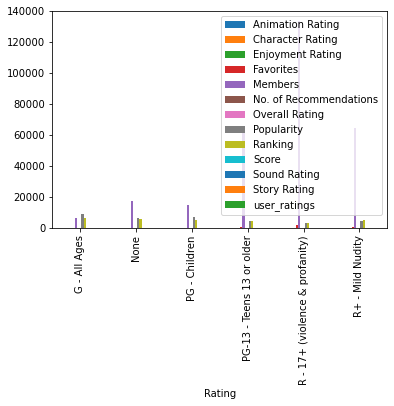

In [40]:
Rating_feature.plot(kind='bar')

In [41]:
Genres_feature = pd.pivot_table(data=df_details,index=['Genres'])
Genres_feature
#Woah, over 4k combinations of Genre.... I will need to handle this feature differently (not just encoding the column).

,Animation Rating,Character Rating,Enjoyment Rating,Favorites,Members,No. of Recommendations,Overall Rating,Popularity,Ranking,Score,Sound Rating,Story Rating,user_ratings
Genres,,,,,,,,,,,,,
Action,8.0,6.8,7.2,51.189189,1.939224e+04,7.0,6.0,7438.135135,7227.081081,6.108919,7.4,6.4,6.108919
"Action, Adventure",8.0,5.5,5.5,287.000000,4.262586e+04,19.0,6.0,7049.285714,6620.714286,6.262857,7.5,4.5,6.262857
"Action, Adventure, Cars, Comedy, Kids, Police",NaN,NaN,NaN,1.000000,3.360000e+02,NaN,NaN,12833.000000,9316.000000,5.560000,NaN,NaN,5.560000
"Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",10.0,10.0,10.0,16.500000,6.249500e+03,NaN,10.0,5957.000000,4852.500000,6.700000,10.0,10.0,6.700000
"Action, Adventure, Cars, Sci-Fi",7.0,6.0,7.0,27.000000,1.626500e+04,NaN,7.0,3889.000000,4640.000000,6.750000,6.0,8.0,6.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Supernatural, Shounen",0.0,0.0,0.0,75.500000,3.730000e+04,1.0,7.0,2909.500000,4083.000000,6.920000,0.0,0.0,6.920000
"Supernatural, Vampire",NaN,NaN,NaN,13.000000,6.599000e+03,NaN,NaN,5647.000000,6192.000000,6.430000,NaN,NaN,6.430000
"Thriller, Mystery, Sci-Fi",NaN,NaN,NaN,6.000000,5.152000e+03,NaN,NaN,6209.000000,5721.000000,6.520000,NaN,NaN,6.520000


In [42]:
df_details['Genres'] = df_details['Genres'].str.split(', ')
dfx = pd.get_dummies(pd.DataFrame(df_details['Genres'].tolist()).stack()).sum(level=0)
df_details = pd.concat([df_details, dfx], axis=1).drop(columns=['Genres'])
df_details.head()

,Anime Title,Episodes,Aired,Producers,Licensors,Studios,Source,Duration,Rating,Score,Ranking,Popularity,Members,Favorites,Summary,Username,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Recommended Title,No. of Recommendations,uid,user_ratings,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,No genres have,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,Fullmetal Alchemist: Brotherhood,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),9.22,0,4,2025613,167812,"""In order for something to be obtained, someth...",tazillo,10.0,10.0,9.0,9.0,10.0,10.0,"First of all, I have seen the original FMA and...",Hunter x Hunter (2011),87.0,tazillo,9.22,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Steins;Gate,24,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older,9.12,1,8,1636151,139909,The self-proclaimed mad scientist Rintarou Oka...,Archaeon,8.0,8.0,8.0,8.0,8.0,8.0,"""People assume that time is a strict progressi...",Boku dake ga Inai Machi,104.0,Archaeon,9.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Gintama°,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older,9.11,2,330,363879,10353,"Gintoki, Shinpachi, and Kagura return as the f...",Tyrel,10.0,10.0,9.0,10.0,10.0,10.0,Have you ever wanted to laugh so hard that it ...,SKET Dance,3.0,Tyrel,9.11,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,Hunter x Hunter (2011),148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",Viz Media,Madhouse,Manga,23 min. per ep.,PG-13 - Teens 13 or older,9.11,3,14,1459320,130492,Hunter x Hunter is set in a world where Hunter...,Cresherhsm,10.0,10.0,9.0,8.0,10.0,10.0,The lack of popularity surrounding Hunter x Hu...,Fullmetal Alchemist: Brotherhood,87.0,Cresherhsm,9.11,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,Ginga Eiyuu Densetsu,110,"Jan 8, 1988 to Mar 17, 1997","Kitty Films, K-Factory",Sentai Filmworks,"Artland, Magic Bus",Novel,26 min. per ep.,R - 17+ (violence & profanity),9.10,4,629,212162,13100,The 150-year-long stalemate between the two in...,santetjan,10.0,10.0,8.0,10.0,9.0,10.0,This series is overrated on this site. That is...,Code Geass: Hangyaku no Lelouch,20.0,santetjan,9.10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
Genre_features = ['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire']  # , 'No genres have']
Anime_features = ['Score', 'Popularity',  'Members', 'Favorites', 'Episodes', 'Rating', 'Overall Rating', 'Story Rating', 'Animation Rating', 'Sound Rating', 'Character Rating', 'Enjoyment Rating']  #,'Score', 'Popularity',  'Members', 'Favorites']
Anime_Matrix = df_details[['Ranking']+['Source']+Anime_features+Genre_features].drop_duplicates().sort_values('Ranking').reset_index()
# Let's try filling the null values with zeros, to see if we can make use of the user ratings (overall, story, character, story, etc..):
Anime_Matrix1 = Anime_Matrix.fillna(0)

# Lets also replace some feature values where text like "None" was used in place of null-values:
Anime_Matrix1['Episodes'] = Anime_Matrix1['Episodes'].replace(['Unknown'], 0)
Anime_Matrix1["Episodes"] = pd.to_numeric(Anime_Matrix1["Episodes"])

# Let's also encode the Rating (R, PG-13):
Anime_Matrix1['Rating'] = Anime_Matrix1['Rating'].map({'None': 0, 'G - All Ages': 1, 'PG - Children': 2, 'PG-13 - Teens 13 or older': 3, 'R - 17+ (violence & profanity)': 4, 'R+ - Mild Nudity': 5})

# encoding the categorical column 'Source':
Anime_Matrix1['Source'] = Anime_Matrix1['Source'].map({'Light novel': 0, 'Manga': 1, 'Web manga': 2, 'Visual novel': 3, 'Novel': 4, 'Original': 5, '4-koma manga': 6, 'Other': 7, 'Digital manga': 8, 'Game': 9, 'Card game': 10, 'Music': 11, 'Book': 12, 'Picture Book': 13, 'Radio': 14, 'Unknown': 15})

# Let's fill any remaining null values with zeros, so the KNN algorithm can be run:
Anime_Matrix1 = Anime_Matrix1.fillna(0)

Anime_Matrix1.head()

,index,Ranking,Source,Score,Popularity,Members,Favorites,Episodes,Rating,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,0,0,1.0,9.22,4,2025613,167812,64,4,10.0,10.0,9.0,9.0,10.0,10.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,3.0,9.12,8,1636151,139909,24,3,8.0,8.0,8.0,8.0,8.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,2,1.0,9.11,330,363879,10353,51,3,10.0,10.0,9.0,10.0,10.0,10.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,3,3,1.0,9.11,14,1459320,130492,148,3,10.0,10.0,9.0,8.0,10.0,10.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4,4,4.0,9.10,629,212162,13100,110,4,10.0,10.0,8.0,10.0,9.0,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [53]:
k=10
knn = NearestNeighbors(metric = 'jaccard', n_neighbors = k)
knn.fit(Anime_Matrix1.drop(columns=['Ranking']))
distances, indices = knn.kneighbors(Anime_Matrix1.drop(columns=['Ranking']))

/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [54]:
rec1_Animes(0) # Full Metal Alchemist
rec1_Animes(3) # Hunter x Hunter
rec1_Animes(16) # Code Geass
rec1_Animes(23) # Cowboy Bebop
rec1_Animes(27) # Monogatari
rec1_Animes(47) # Howl's Moving Castle

Titles similar to  Fullmetal Alchemist: Brotherhood
Fullmetal Alchemist: Brotherhood
Fullmetal Alchemist
Fullmetal Alchemist: The Sacred Star of Milos
Fullmetal Alchemist: Brotherhood Specials
One Piece: Heart of Gold
One Piece Film: Gold
Fairy Tail (2014)
Fairy Tail
Digimon Frontier
Fairy Tail: Final Series

___________________________________________________
Titles similar to  Hunter x Hunter (2011)
Hunter x Hunter: Greed Island Final
Hunter x Hunter
Hunter x Hunter Movie 2: The Last Mission
Hunter x Hunter: Greed Island
Hunter x Hunter (2011)
One Piece: Umi no Heso no Daibouken-hen
One Piece: Episode of Luffy - Hand Island no Bouken
One Piece Movie 4: Dead End no Bouken
One Piece Movie 2: Nejimaki-jima no Daibouken
One Piece Film: Gold Episode 0 - 711 ver.

___________________________________________________
Titles similar to  Code Geass: Hangyaku no Lelouch R2
Code Geass: Hangyaku no Lelouch R2
Code Geass: Fukkatsu no Lelouch
Code Geass: Hangyaku no Lelouch
Soukyuu no Fafner: Dead 

## These are much more relevant titles provided by the Content-Based system and specifying KNN (w/ jaccard metric)! For Cowboy Bebop we got appropriate recommendations such as Outlaw Star, Trigun, Captain Herlock, and Space Battleship Yamato. This is either a 100% or 90% subjective hit rate, depending on your opinion of Urusei Yatsura 6 (which is technically a space adventure movie).

# Content-Based Recommender, Conclusion: This approach was a much better fit for this dataset, provided all of the genres and complete set of details per title. There could be more legwork put into the other user-item collaborative models, and they could improve if a larger set of ratings was accumulated, but the content-based recommender did very well with relatively little feature engineering.